# Day_078

### 練習時間
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

確認硬體資源

!nvidia-smi

In [1]:
import os
import keras
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.models import Model, Sequential

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
# 資料前處理
def preproc_x(x, flatten=True):
    x = (((x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))) - 1) * 2
    #x = ((x - min(x)) / ( max(x) - min(x))) * 2 - 1   
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
x_train.shape

(50000, 3072)

In [7]:
def build_mlp(input_shape, output_units = 10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units = n_units, activation = "relu", name = "hidden_layer" + str(i+1))(input_layer)
        else:
            x = Dense(units = n_units, activation = "relu", name = "hidden_layer" + str(i+1))(x)
    
    out = Dense(units = output_units, activation = "softmax", name = "output")(x)
    
    model = Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
model = build_mlp(input_shape = x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [9]:
# 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [ ]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = optimizer)

In [ ]:
model.fit(x_train, y_train, 
          epochs = EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data = (x_test, y_test), 
          shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 35s 694us/step - loss: 2.0863 - acc: 0.2405 - val_loss: 1.9806 - val_acc: 0.2812
Epoch 2/100
50000/50000 [==============================] - 33s 662us/step - loss: 1.8386 - acc: 0.3379 - val_loss: 1.7944 - val_acc: 0.3577
Epoch 3/100
50000/50000 [==============================] - 33s 653us/step - loss: 1.6583 - acc: 0.4019 - val_loss: 1.7354 - val_acc: 0.3739
Epoch 5/100
50000/50000 [==============================] - 33s 657us/step - loss: 1.6072 - acc: 0.4238 - val_loss: 1.5869 - val_acc: 0.4362
Epoch 6/100
50000/50000 [==============================] - 33s 653us/step - loss: 1.5668 - acc: 0.4407 - val_loss: 1.5630 - val_acc: 0.4388
Epoch 7/100
50000/50000 [==============================] - 32s 649us/step - loss: 1.5206 - acc: 0.4535 - val_loss: 1.5168 - val_acc: 0.4568
Epoch 8/100
50000/50000 [==============================] - 33s 662us/step - loss: 1.4895 - acc: 0.4690 - val_l

Epoch 60/100
50000/50000 [==============================] - 34s 682us/step - loss: 0.7269 - acc: 0.7392 - val_loss: 1.8759 - val_acc: 0.5134
Epoch 61/100
50000/50000 [==============================] - 34s 681us/step - loss: 0.7197 - acc: 0.7410 - val_loss: 1.8424 - val_acc: 0.5056
Epoch 62/100
50000/50000 [==============================] - 35s 699us/step - loss: 0.6925 - acc: 0.7518 - val_loss: 1.8966 - val_acc: 0.4940
Epoch 63/100
50000/50000 [==============================] - 34s 685us/step - loss: 0.6934 - acc: 0.7508 - val_loss: 1.9577 - val_acc: 0.5037
Epoch 64/100
50000/50000 [==============================] - 34s 683us/step - loss: 0.6892 - acc: 0.7528 - val_loss: 1.9106 - val_acc: 0.5095
Epoch 65/100
50000/50000 [==============================] - 34s 686us/step - loss: 0.6692 - acc: 0.7599 - val_loss: 1.9878 - val_acc: 0.5012
Epoch 66/100
50000/50000 [==============================] - 36s 717us/step - loss: 0.6585 - acc: 0.7630 - val_loss: 1.9708 - val_acc: 0.5023
Epoch 67/100


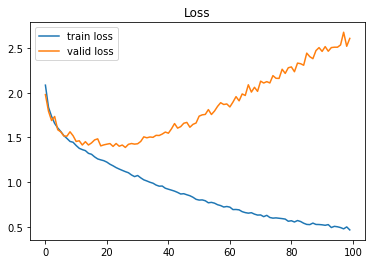

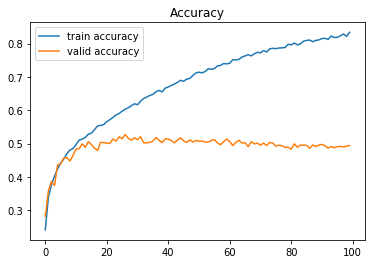

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()